This code is part of the lab forum at AAAI-25 on "Developing explainable multimodal AI models with hands-on lab on the life-cycle of rare event prediction in manufacturing"

In this code, we will see how to load a manufacturing-specifc dataset and do exploratory analysis.

#The datasets used in this lab can be downloaded from

1. Pulp and paper manufacturing dataset: https://drive.google.com/file/d/1BQuWml4T18DoTf39eNeYyiX5yrYTtY7p/view?usp=drive_link
2. Future factories multimodal dataset: https://drive.google.com/drive/folders/1l7_Blmk_RrsLHqcW_4F7-ELtll_ZGyDv
3. Future factories image dataset: https://drive.google.com/drive/folders/1VdIsSouurlVAFRLaZnPuemsDXLyKRN-2?usp=drive_link





#Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load a Time Series Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Smart Manufacturing_Chathurangi/processminer-rare-event-mts - data.csv")
df.head(n=5)

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,5/1/99 0:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,5/1/99 0:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,5/1/99 0:04,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,5/1/99 0:06,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,5/1/99 0:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


#View Basic Dataset Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    18398 non-null  object 
 1   y       18398 non-null  int64  
 2   x1      18398 non-null  float64
 3   x2      18398 non-null  float64
 4   x3      18398 non-null  float64
 5   x4      18398 non-null  float64
 6   x5      18398 non-null  float64
 7   x6      18398 non-null  float64
 8   x7      18398 non-null  float64
 9   x8      18398 non-null  float64
 10  x9      18398 non-null  float64
 11  x10     18398 non-null  float64
 12  x11     18398 non-null  float64
 13  x12     18398 non-null  float64
 14  x13     18398 non-null  float64
 15  x14     18398 non-null  float64
 16  x15     18398 non-null  float64
 17  x16     18398 non-null  float64
 18  x17     18398 non-null  float64
 19  x18     18398 non-null  float64
 20  x19     18398 non-null  float64
 21  x20     18398 non-null  float64
 22

In [ ]:
# Summary of numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Data type information
print(df.dtypes)


                  y            x1            x2            x3            x4  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.006740      0.011824      0.157986      0.569300     -9.958345   
std        0.081822      0.742875      4.939762      5.937178    131.033712   
min        0.000000     -3.787279    -17.316550    -18.198509   -322.781610   
25%        0.000000     -0.405681     -2.158235     -3.537054   -111.378372   
50%        0.000000      0.128245     -0.075505     -0.190683    -14.881585   
75%        0.000000      0.421222      2.319297      3.421223     92.199134   
max        1.000000      3.054156     16.742105     15.900116    334.694098   

                 x5            x6            x7            x8            x9  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.006518      2.387533      0.001647     -0.004125     -0.003056   
std        0.634054     37.104012      0.108870    

# Exploratory Data Analysis

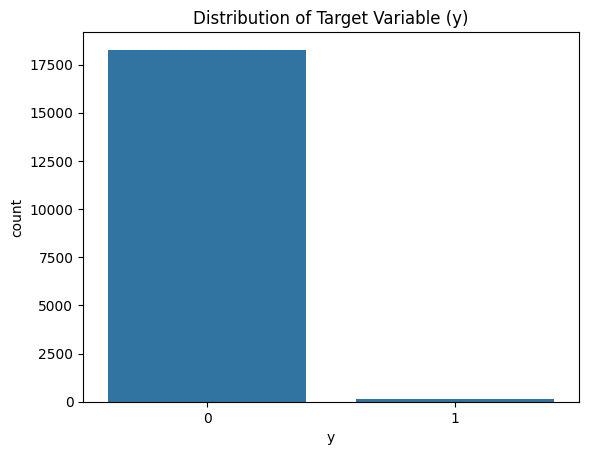

In [ ]:
#1. Visualizing Class Distribution

# Class distribution of target variable y
sns.countplot(x=df["y"])
plt.title("Distribution of Target Variable (y)")
plt.show()


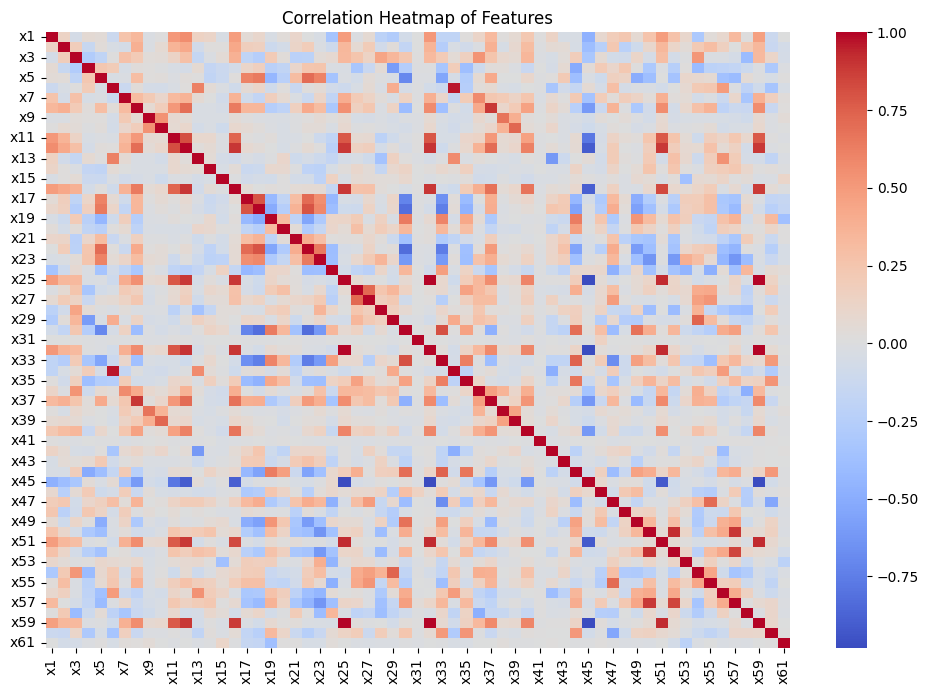

In [ ]:
#2. Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[:, 2:].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()


<ipython-input-8-447069f0e5b4>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'], errors='coerce')  # Convert time column


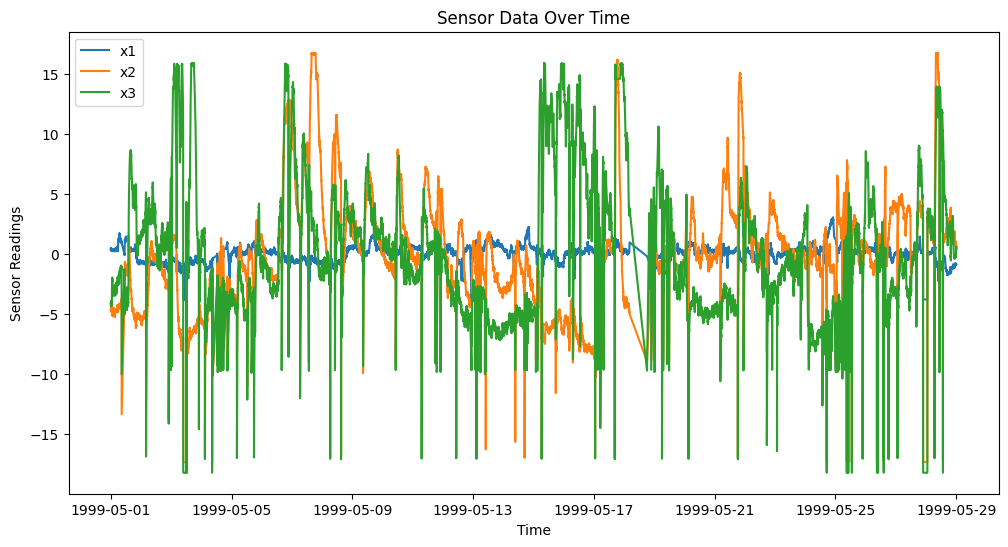

In [ ]:
#3. Time-Series Trend of a Few Features

df['time'] = pd.to_datetime(df['time'], errors='coerce')  # Convert time column

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['x1'], label="x1")
plt.plot(df['time'], df['x2'], label="x2")
plt.plot(df['time'], df['x3'], label="x3")
plt.xlabel("Time")
plt.ylabel("Sensor Readings")
plt.legend()
plt.title("Sensor Data Over Time")
plt.show()


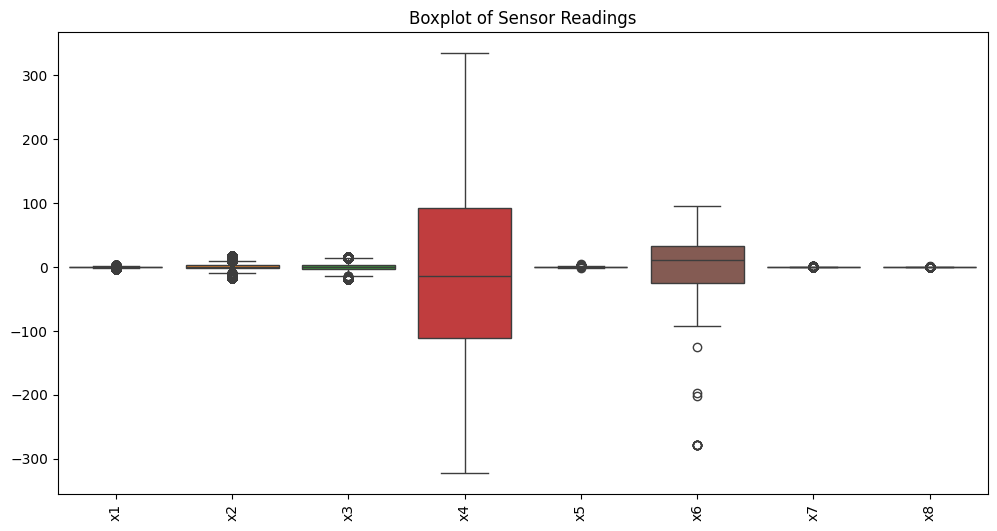

In [ ]:
#4. Checking for Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 2:10])  # First few sensor variables
plt.xticks(rotation=90)
plt.title("Boxplot of Sensor Readings")
plt.show()
